# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Leads.csv")

In [3]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.shape

(9240, 37)

In [6]:
numerical_cols = data.select_dtypes(include='number').columns
categorical_cols = data.select_dtypes(exclude='number').columns

In [7]:
len(numerical_cols)

7

In [8]:
len(categorical_cols)

30

In [9]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
len(data)

9240

In [11]:
miss_values = round(data.isnull().sum()/len(data)*100)
miss_values

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [12]:
#Removing column Prospect ID
data.drop('Prospect ID',axis = 1,inplace=True)
data.drop('Lead Number',axis = 1,inplace=True)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
# Replacing Select with NaN
data.replace('Select',np.NaN,inplace=True)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
miss_values = round(data.isnull().sum()/len(data)*100)
miss_values

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [15]:
cols_to_drop = miss_values[miss_values >= 40].index
cols_to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [16]:
data.drop(columns = cols_to_drop, inplace = True)

In [17]:
data.shape

(9240, 27)

In [18]:
data["Tags"].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [19]:
data["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [20]:
tgs_mss = data["Tags"].isnull().sum()
tgs_mss/len(data)*100

36.28787878787879

In [21]:
# ~36% data missing, created new category named as "Not defined"

In [22]:
data["Tags"].fillna("Not defined",inplace =True)

In [23]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [24]:
data["Lead Source"].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [25]:
data["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [26]:
data["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [27]:
data["Specialization"].isnull().sum()

3380

In [28]:
data['Specialization'].fillna('Not Specified', inplace=True)

In [29]:
# if ctagorical col has less than 30% missing values filled by mode

In [30]:
categorical_columns = data.select_dtypes(include=["object"]).columns
for column_name in categorical_columns:
    if data[column_name].isnull().any():
        mode_value = data[column_name].mode()[0]
        data[column_name].fillna(mode_value, inplace=True)

In [31]:
data["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [32]:
data["TotalVisits"].mean()

3.445237833681204

In [33]:
# there is all interger values and filling by mean create decimal value that's why filled by using mode

In [34]:
data["TotalVisits"].fillna(data["TotalVisits"].mode()[0], inplace=True)

In [35]:
data["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [36]:
# it already has floating/decimal values, filled by mean

In [37]:
data["Page Views Per Visit"].fillna(data["Page Views Per Visit"].mean(), inplace=True)

In [38]:
data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [39]:
data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,No,No,No,wrong number given,No,No,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,No,No,No,invalid number,No,No,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,No,No,No,Not defined,No,No,No,No,SMS Sent


In [40]:
# data.to_csv("Lead Data.csv")

# Analysis using plots

In [41]:
!pip install --upgrade matplotlib seaborn

In [42]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [43]:
data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,No,No,No,wrong number given,No,No,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,No,No,No,invalid number,No,No,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,No,No,No,Not defined,No,No,No,No,SMS Sent


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [45]:
data.shape

(9240, 27)

In [46]:
data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

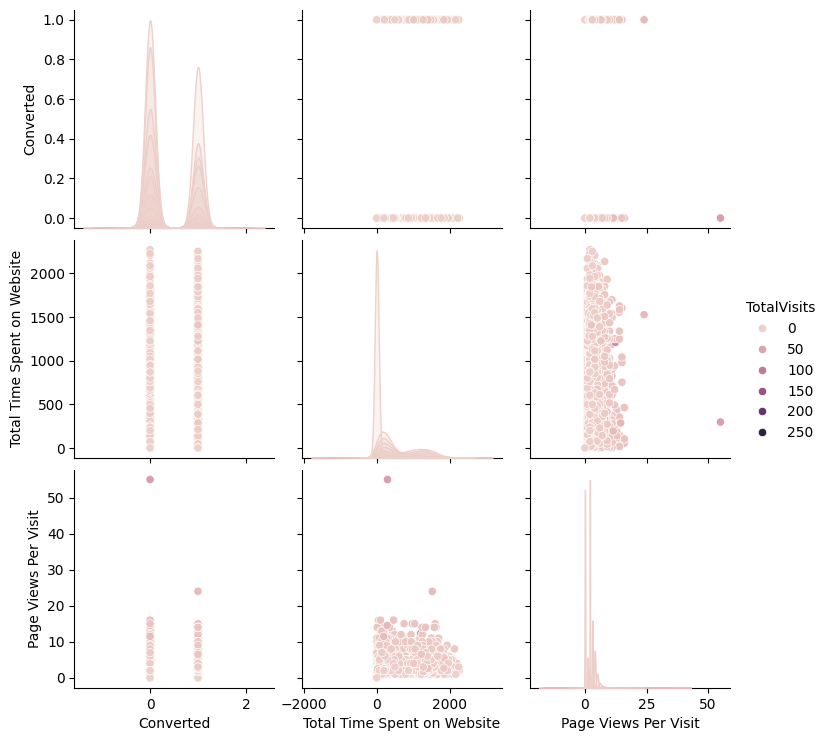

In [47]:
sns.pairplot(data, hue='TotalVisits')
plt.show()

Inference:

The Total visits across all the varibales

In [48]:
# Check unique values in the 'Tags' column
unique_tags = data['Tags'].unique()
print(unique_tags)


['Interested in other courses' 'Ringing'
 'Will revert after reading the email' 'Not defined' 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Not defined'),
  Text(4, 0, 'Lost to EINS'),
  Text(5, 0, 'In confusion whether part time or DLP'),
  Text(6, 0, 'Busy'),
  Text(7, 0, 'switched off'),
  Text(8, 0, 'in touch with EINS'),
  Text(9, 0, 'Already a student'),
  Text(10, 0, 'Diploma holder (Not Eligible)'),
  Text(11, 0, 'Graduation in progress'),
  Text(12, 0, 'Closed by Horizzon'),
  Text(13, 0, 'number not provided'),
  Text(14, 0, 'opp hangup'),
  Text(15, 0, 'Not doing further education'),
  Text(16, 0, 'invalid number'),
  Text(17, 0, 'wrong number given'),
  Text(18, 0, 'Interested  in full time MBA'),
  Text(19, 0, 'Still Thinking'),
  Text(20, 0, 'Lost to Others'),
  Text(21, 0, 'Shall take in the next coming month'),
  Text(22, 

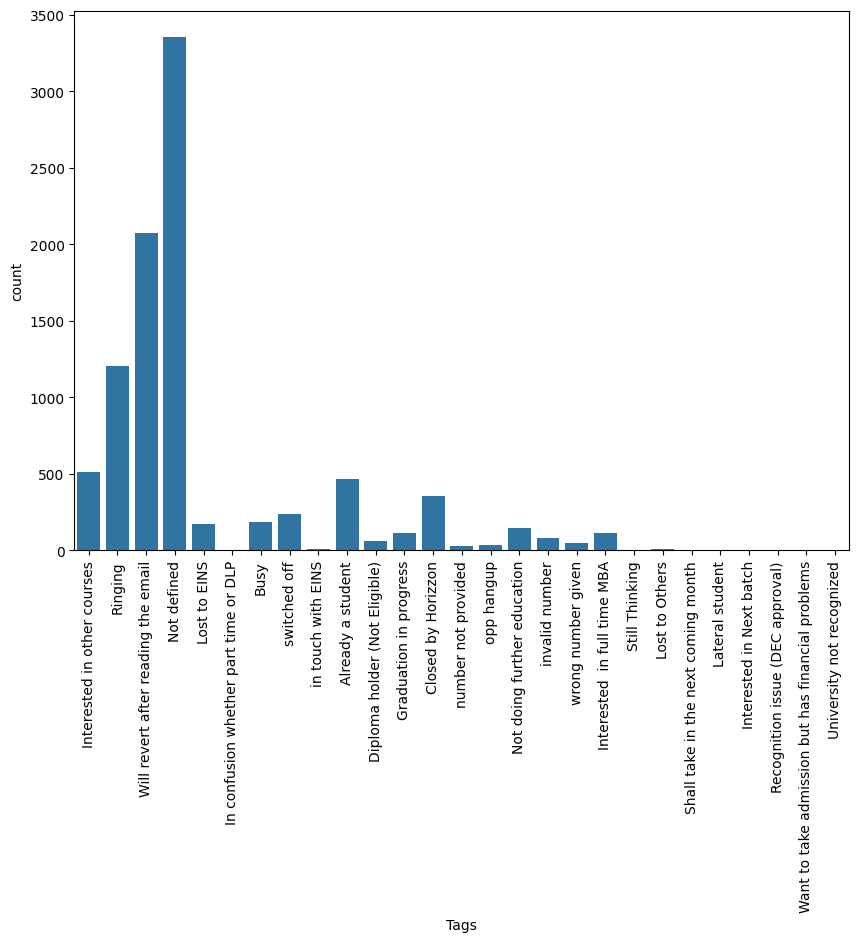

In [49]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(x = 'Tags', data = data)
plt.xticks(rotation=90)

Inference:

1.The highest call status is "Not Defined"

2.The 40% of respondents will revert after reading the email.

3.The 20% of respondents call status is ringing

([0, 1, 2],
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

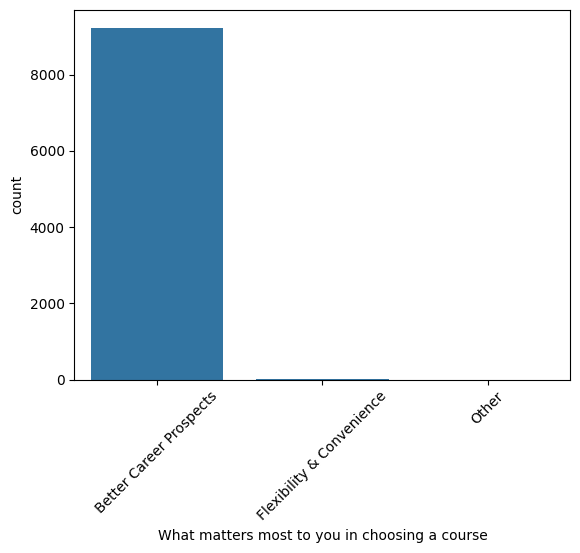

In [50]:
# Visualizing this column
sns.countplot(x = 'What matters most to you in choosing a course', data = data)
plt.xticks(rotation=45)

Inference:


The Highest Votes for choosing the course is Better Career Prospects

In [51]:
# Finding the percentage of the different categories of this column:
round(data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [52]:
# Finding the percentage of the different categories of this column:
round(data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              90.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

# Analysis & Plotting

In [53]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.53896103896104

The Lead conversion rate is 38%

([0, 1, 2, 3, 4],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

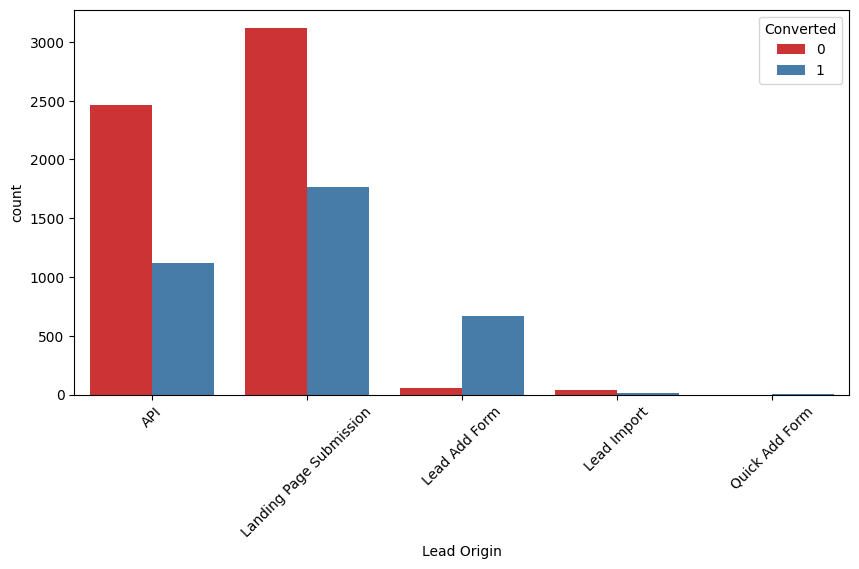

In [54]:
#LEAD ORIGIN

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 45)

Inference:

1.API and Landing Page Submissions yield a conversion rate of 30-35%, resulting in a substantial number of generated leads.

2.The Lead Add Form boasts an impressive conversion rate exceeding 90%, although the total lead count remains relatively low.

3.Lead Imports contribute very few leads to the overall count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'google'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

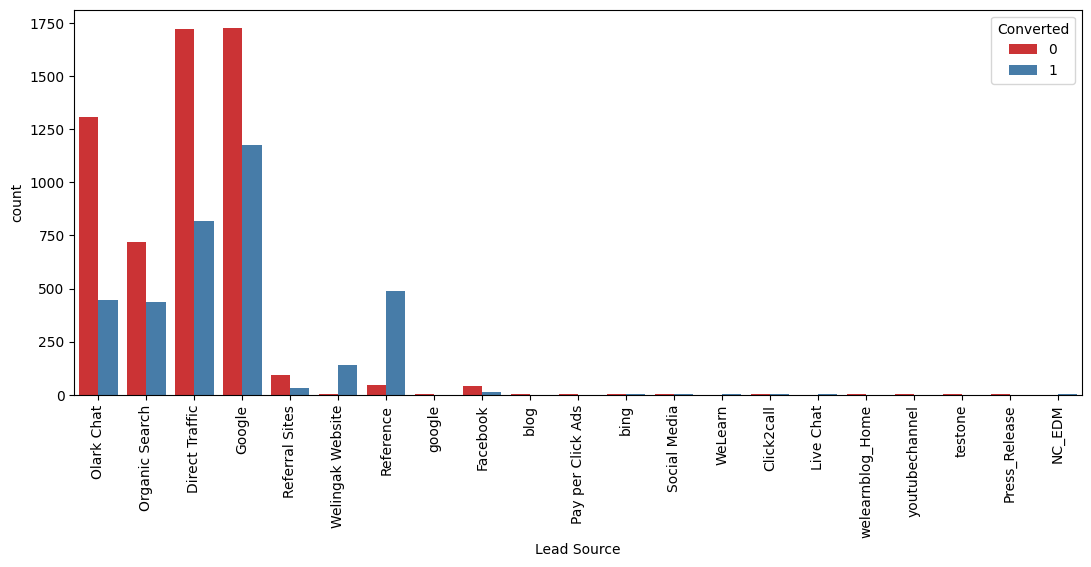

In [55]:
#LEAD SOURCE

plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, palette='Set1')
plt.xticks(rotation = 90)

In [56]:
# Need to replace 'google' with 'Google'
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')

In [57]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

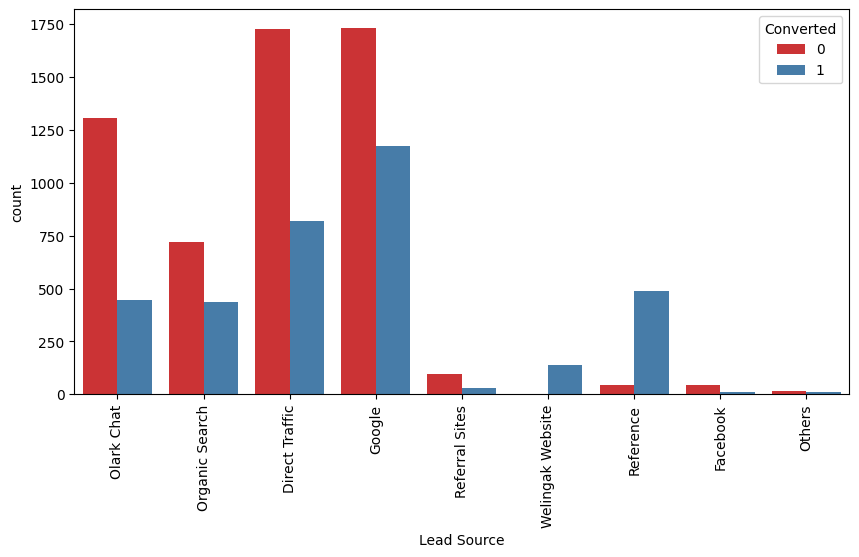

In [58]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

1.The most substantial number of leads is generated through Google and Direct traffic sources.

2.The conversion rate for reference leads and leads originating from the Welingak website is notably high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

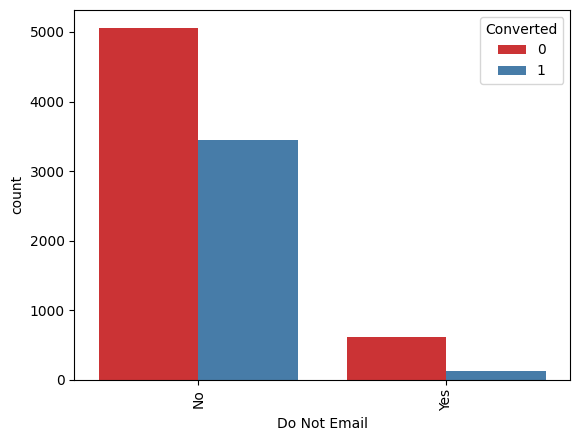

In [59]:
#DO NOT EMAIL

sns.countplot(x = "Do Not Email", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Most of the entries are 'NO' No Inference can be drawn with this parameter.


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

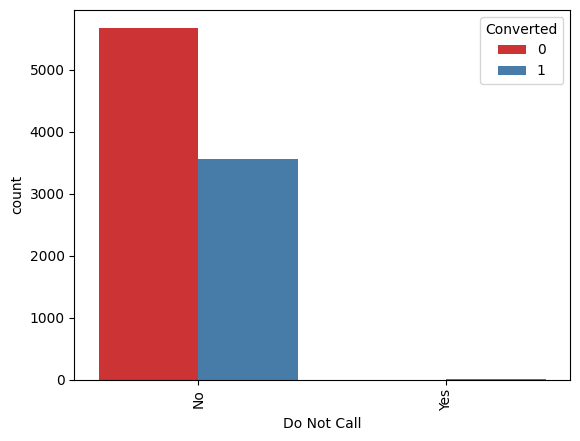

In [60]:
#DO NOT CALL

sns.countplot(x = "Do Not Call", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Most entries are 'No'. No Inference can be drawn with this parameter.

In [61]:
#TOTAL VISITS

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: ylabel='TotalVisits'>

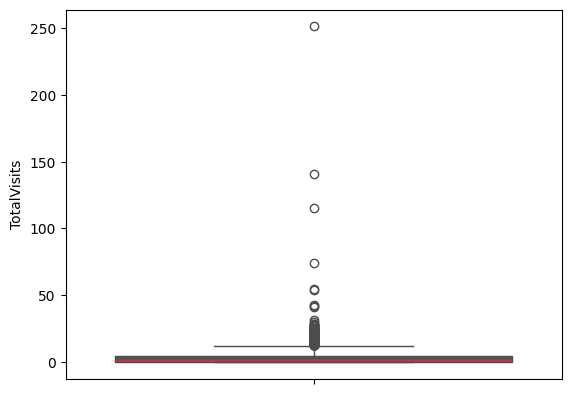

In [62]:
sns.boxplot(data['TotalVisits'],orient='vert',palette='Set1')

Inference:

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [63]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='TotalVisits'>

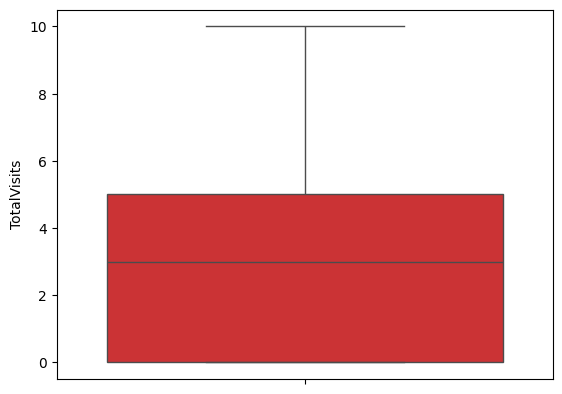

In [64]:
# Visualizing again
sns.boxplot(data['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

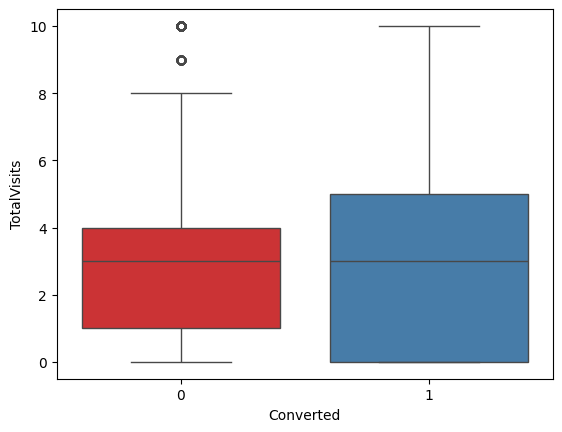

In [65]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data,palette='Set1')

Inference:

Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

In [66]:
#TOTAL TIME SPENT ON WEBSITE

data['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: ylabel='Total Time Spent on Website'>

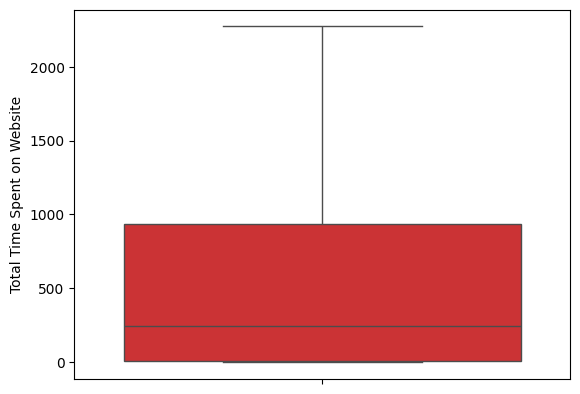

In [67]:
sns.boxplot(data['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

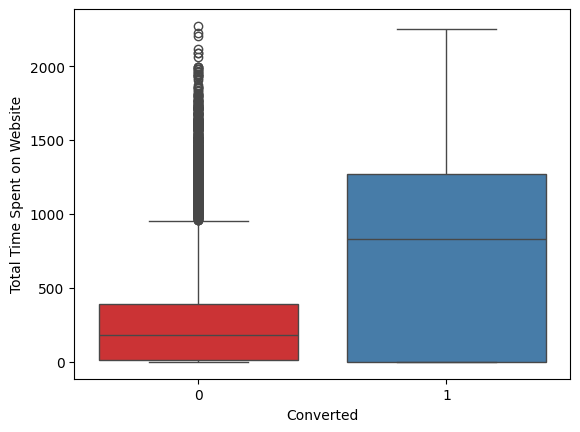

In [68]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data,palette='Set1')

Inference:

Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time.

In [69]:
#PAGE VIEW PER VISIT

data['Page Views Per Visit'].describe()

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: ylabel='Page Views Per Visit'>

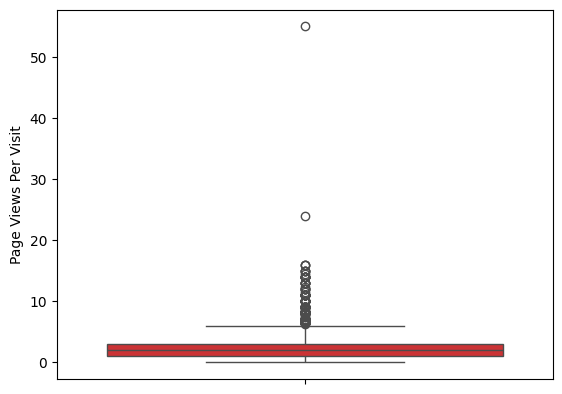

In [70]:
sns.boxplot(data['Page Views Per Visit'],orient='vert',palette='Set1')

Inference:

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [71]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='Page Views Per Visit'>

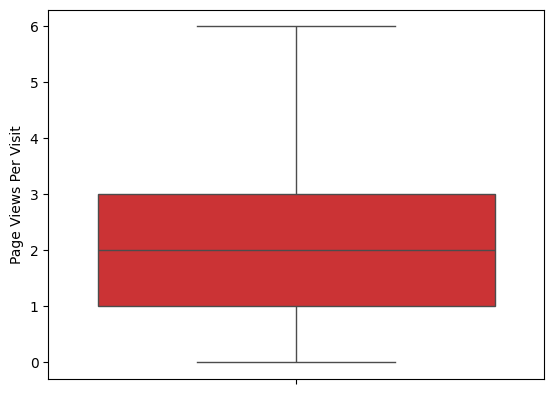

In [72]:
# Visualizing again
sns.boxplot(data['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

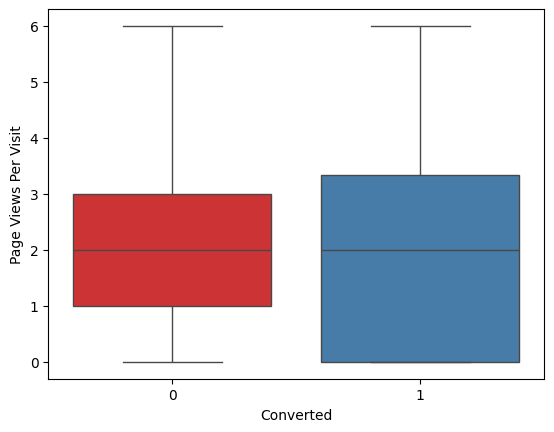

In [73]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =data,palette='Set1')

Inference:

Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

In [74]:
#LAST ACTIVITY

data['Last Activity'].describe()

count             9240
unique              17
top       Email Opened
freq              3540
Name: Last Activity, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'Approached upfront'),
  Text(12, 0, 'SMS Sent'),
  Text(13, 0, 'Visited Booth in Tradeshow'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

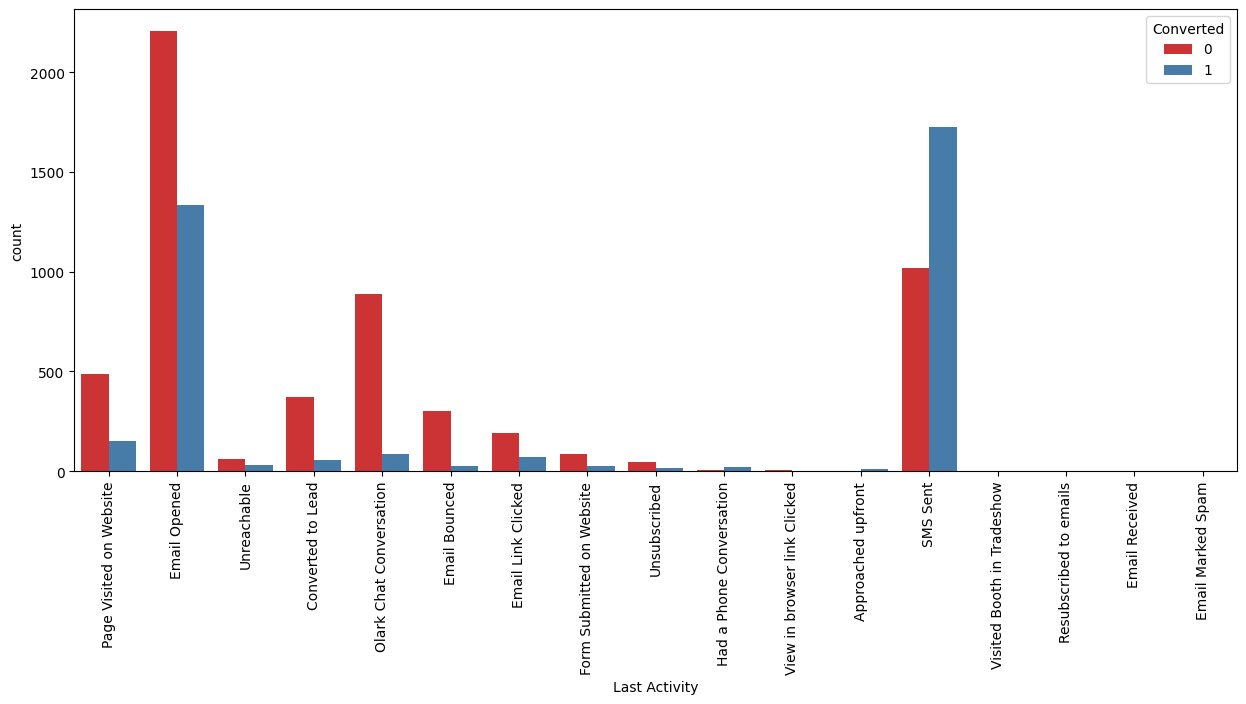

In [75]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

In [76]:
# We can club the last activities to "Other_Activity" which are having less data.
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

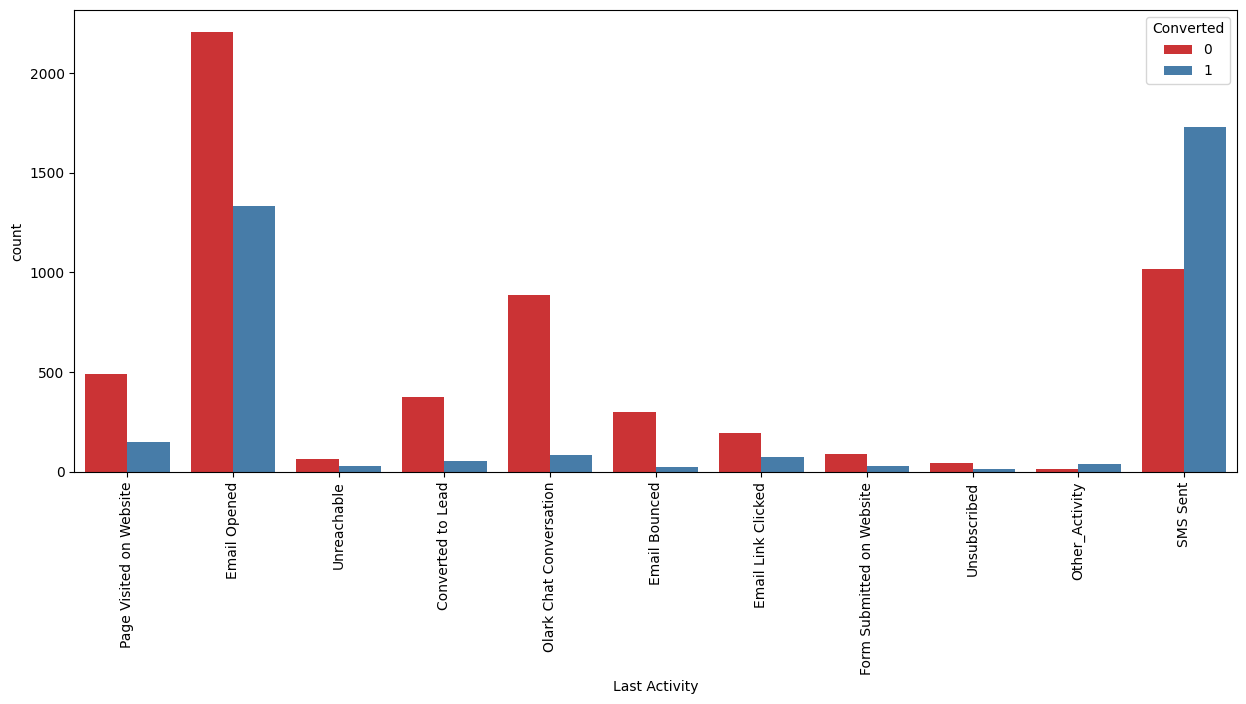

In [77]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:
    
Most of the lead have their Email opened as their last activity.

Conversion rate for leads with last activity as SMS Sent is almost 60%.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'

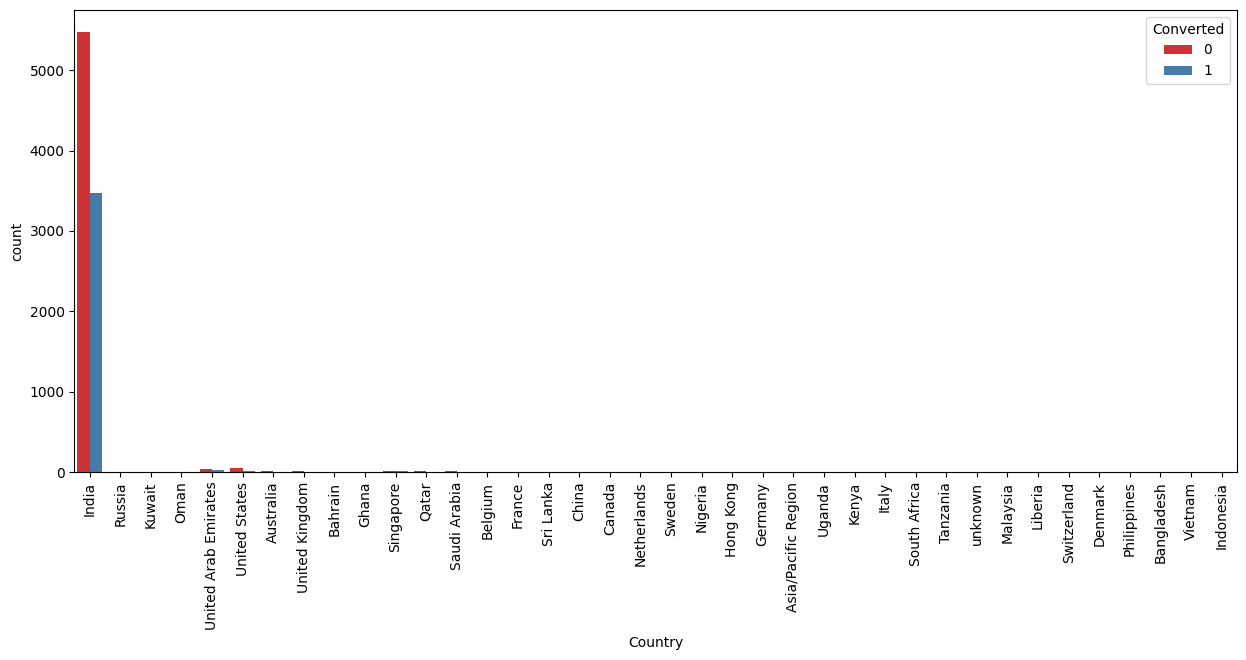

In [78]:
#COUNTRY

plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Most values are 'India' no such inference can be drawn

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Not Specified'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

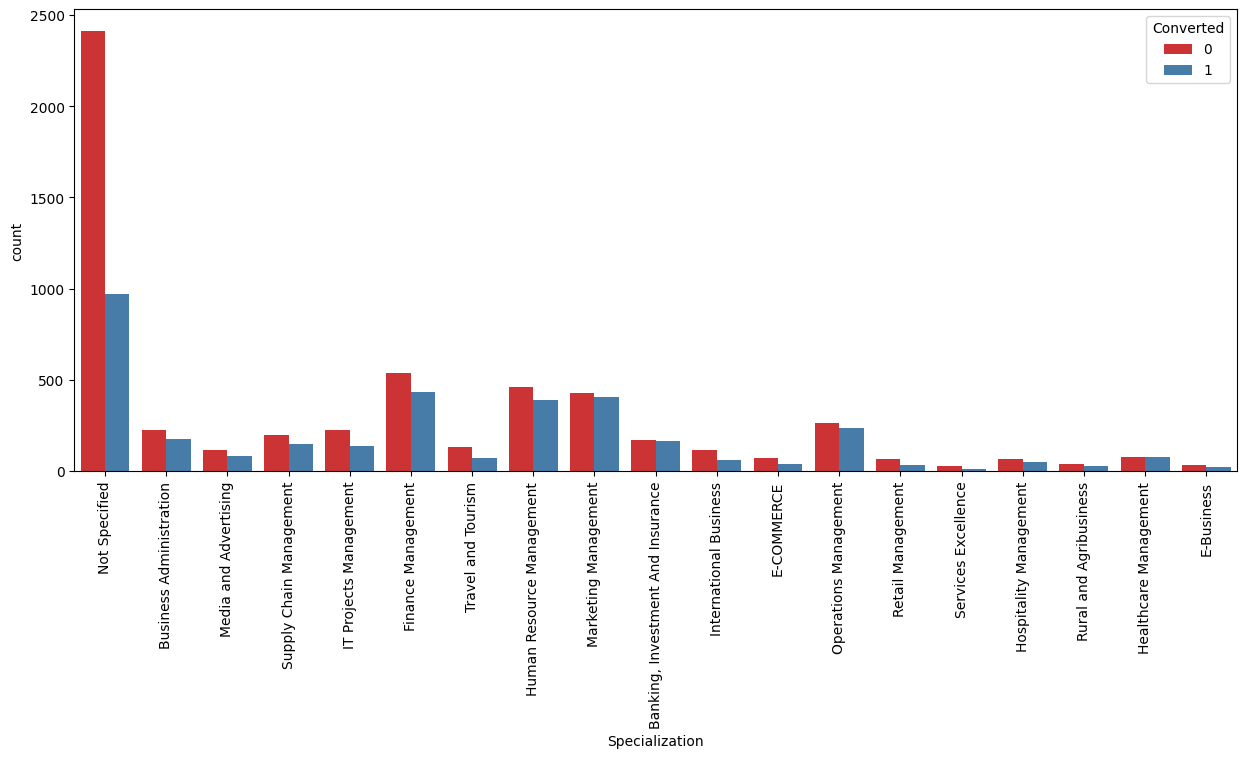

In [79]:
#SPECIALIZATION

plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Focus should be more on the Specialization with high conversion rate.

The industry domain in which the customer worked before. Includes the level 'Not Specified' which means the customer had not specified this option while filling the form.


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

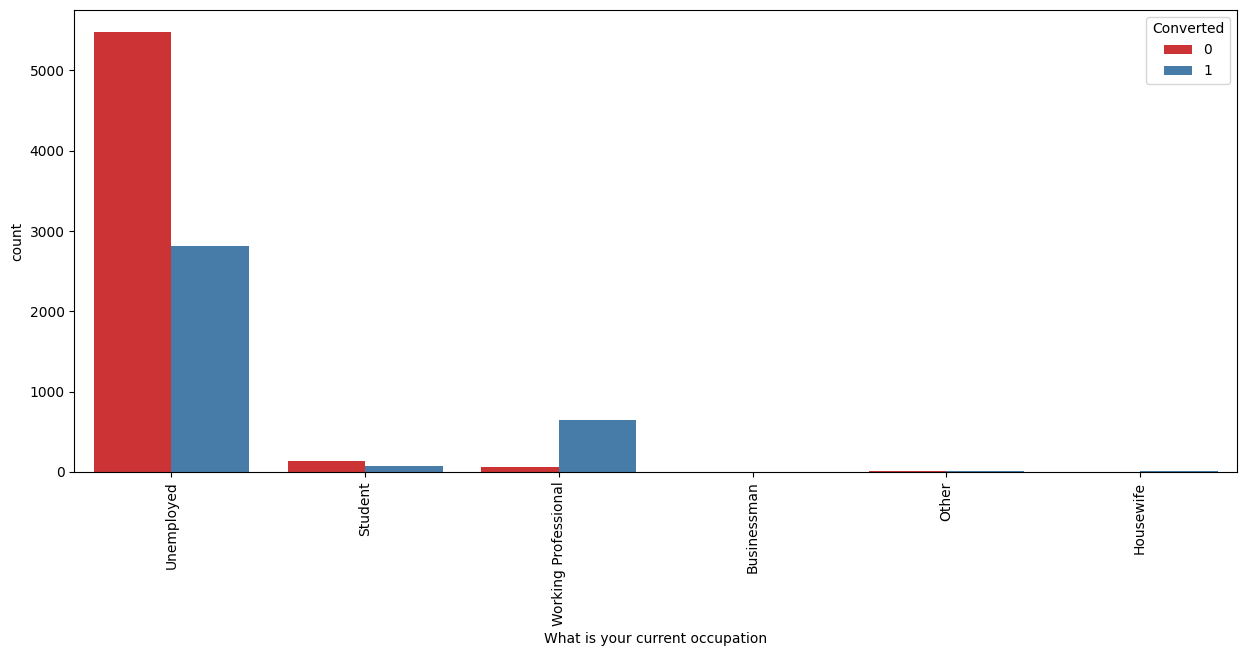

In [80]:
#WHAT IS YOUR CURRENT OCCUPATION

plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

1.Working Professionals going for the course have high chances of joining it.

2.Unemployed leads are the most in numbers but has around 30-35% conversion rate.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Not defined'),
  Text(4, 0, 'Lost to EINS'),
  Text(5, 0, 'In confusion whether part time or DLP'),
  Text(6, 0, 'Busy'),
  Text(7, 0, 'switched off'),
  Text(8, 0, 'in touch with EINS'),
  Text(9, 0, 'Already a student'),
  Text(10, 0, 'Diploma holder (Not Eligible)'),
  Text(11, 0, 'Graduation in progress'),
  Text(12, 0, 'Closed by Horizzon'),
  Text(13, 0, 'number not provided'),
  Text(14, 0, 'opp hangup'),
  Text(15, 0, 'Not doing further education'),
  Text(16, 0, 'invalid number'),
  Text(17, 0, 'wrong number given'),
  Text(18, 0, 'Interested  in full time MBA'),
  Text(19, 0, 'Still Thinking'),
  Text(20, 0, 'Lost to Others'),
  Text(21, 0, 'Shall take in the next coming month'),
  Text(22, 

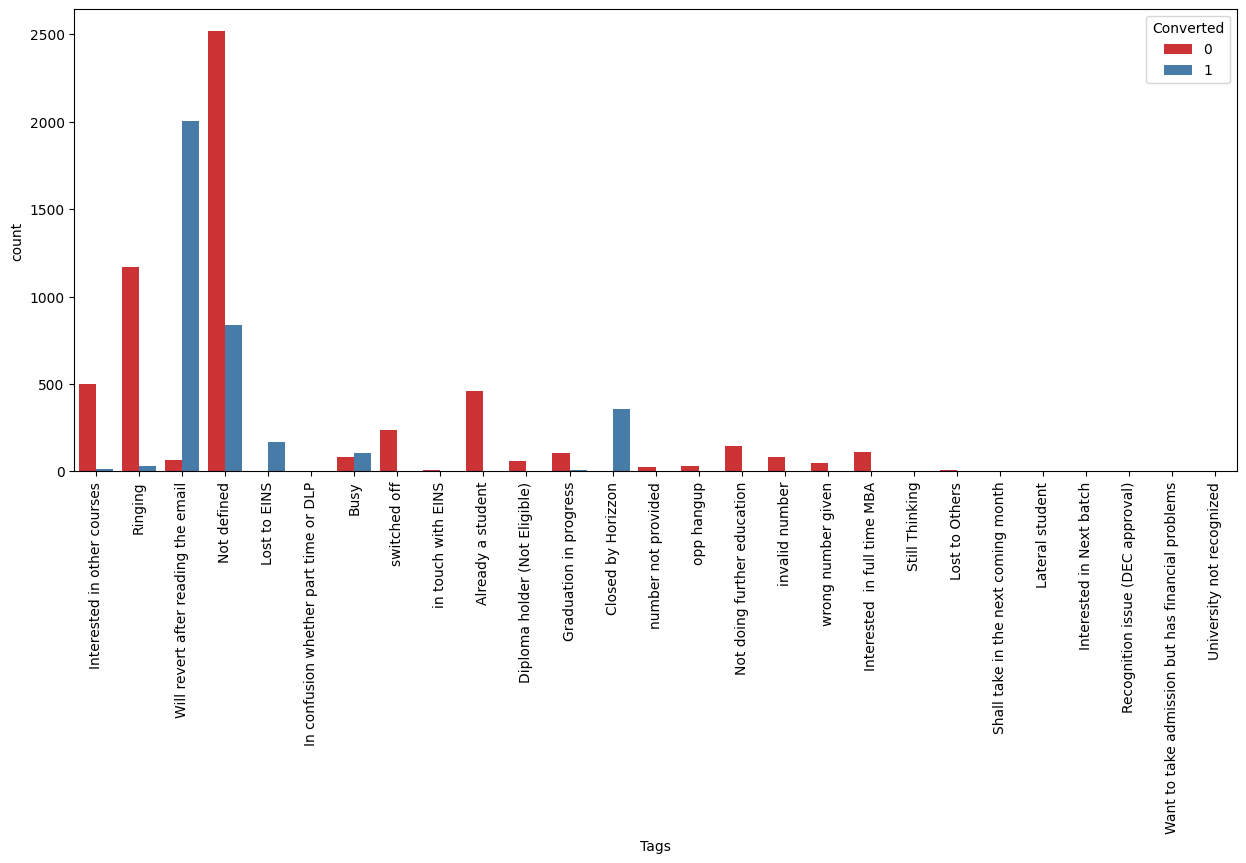

In [81]:
#TAGS

plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

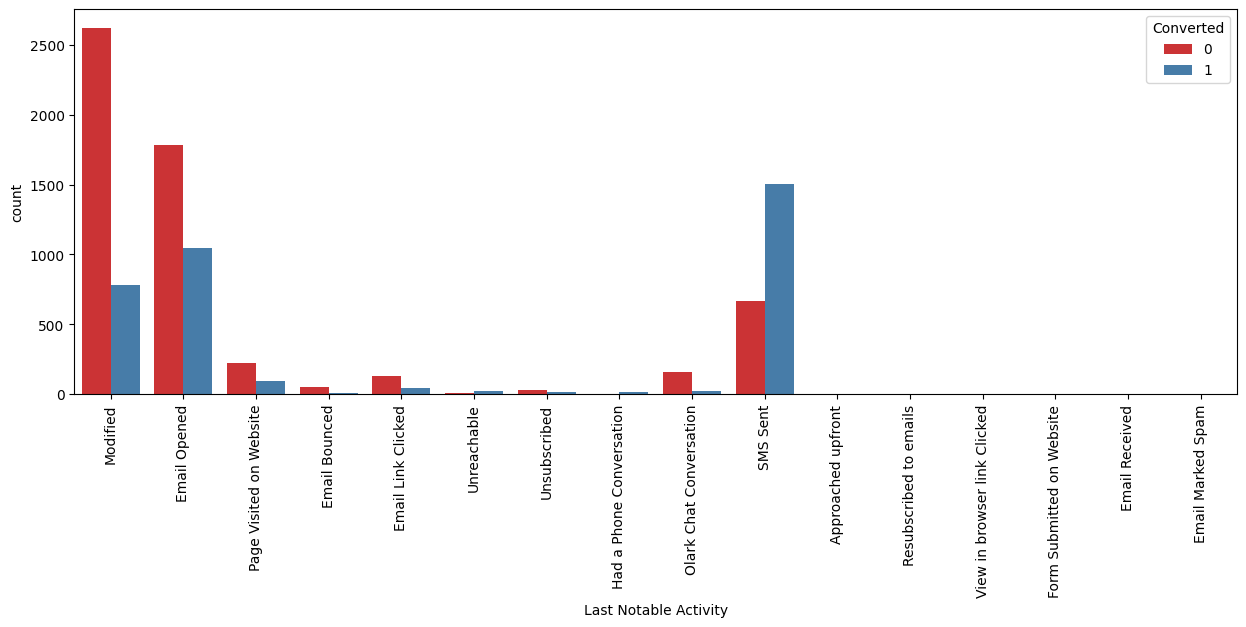

In [82]:
#LAST NOTABLE ACTIVITY

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Results:

Based on the analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [83]:
data = data.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [84]:
data.shape

(9240, 13)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

In [86]:
#Converting some binary variables (Yes/No) to 1/0

In [87]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data[vars] = data[vars].apply(binary_map)

# Creating Dummy Variables for the categorical features
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Profile','City','Last Notable Activity'

In [88]:
data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Last Activity                                  9240 non-null   object
 3   Specialization                                 9240 non-null   object
 4   What is your current occupation                9240 non-null   object
 5   What matters most to you in choosing a course  9240 non-null   object
 6   Last Notable Activity                          9240 non-null   object
dtypes: object(7)
memory usage: 505.4+ KB


In [89]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
dummy_data.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
  

In [91]:
data1=data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course',
                             'Last Notable Activity'],axis=1)

In [92]:
data1.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [93]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Do Not Email                 9240 non-null   int64  
 1   Do Not Call                  9240 non-null   int64  
 2   Converted                    9240 non-null   int64  
 3   TotalVisits                  9240 non-null   float64
 4   Total Time Spent on Website  9240 non-null   int64  
 5   Page Views Per Visit         9240 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 433.2 KB


In [94]:
data1=pd.concat([data1,dummy_data],axis=1)

In [95]:
data1.shape

(9240, 68)

In [96]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Lead Origin_Landing Page Submission                                     

## Feature Scaling

Scaling the  numerical columns in the dataset which have different scales.
I'm   scaling the data using  Standard Scaler.

In [97]:
# Import Standard scaler
from sklearn.preprocessing import StandardScaler

In [98]:
# Scale the three numeric features present in the dataset
scaler = StandardScaler()
data1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(data1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
data1.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,-1.124516,-0.889974,-1.270546,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0.669119,0.339972,0.134624,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,-0.407062,1.905689,-0.146410,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,-0.765789,-0.333396,-0.708478,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,-0.407062,1.715905,-0.708478,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [99]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   float64
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Lead Origin_Landing Page Submission                                     

### **Feature Selection**

### **Feature  Importance**

<Axes: >

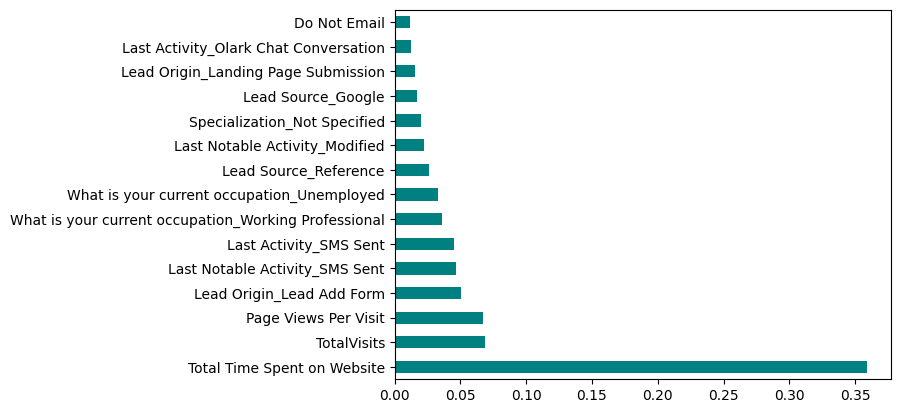

In [100]:
x=data1.drop(['Converted'],axis=1)
#Target Variable
y=data1['Converted']
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x, y)

(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(15)
   .plot(kind='barh',color='teal'))

**Dealing with Multicollinearity problem**(When  Independent vriables are correlated)

In [101]:
correlations = data1.corr()
correlations = correlations.where(np.triu(np.ones(correlations.shape, dtype=bool), k=1))
correlations = correlations.unstack().reset_index()
correlations.columns = ['VAR1', 'VAR2', 'Correlation']
correlations.dropna(subset=["Correlation"], inplace=True)
correlations["Correlation"] = correlations["Correlation"].abs()
correlations.sort_values(by='Correlation', ascending=False, inplace=True)
correlations.head(15)

,VAR1,VAR2,Correlation
688,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
4515,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.877108
1027,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
4377,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.852707
3449,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,0.849653
3828,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.842496
3691,Last Notable Activity_Email Link Clicked,Last Activity_Email Link Clicked,0.800764
343,Page Views Per Visit,TotalVisits,0.759256
2658,Specialization_Not Specified,Lead Origin_Landing Page Submission,0.748263
4240,Last Notable Activity_Page Visited on Website,Last Activity_Page Visited on Website,0.692057


In [102]:
#Dropping highly correlated  variables
data_n=data1.drop(['Lead Origin_Lead Import','Last Activity_Unsubscribed','Lead Source_Reference','Last Activity_SMS Sent','Last Activity_Email Opened','Last Activity_Email Link Clicked','Page Views Per Visit','Last Activity_Page Visited on Website','Last Activity_Email Bounced','Last Activity_Unreachable','Last Activity_Other_Activity', 'Specialization_Not Specified'],axis=1)

In [103]:
correlations = data_n.corr()

correlations = correlations.where(np.triu(np.ones(correlations.shape, dtype=bool), k=1))
correlations = correlations.unstack().reset_index()
correlations.columns = ['VAR1', 'VAR2', 'Correlation']
correlations.dropna(subset=["Correlation"], inplace=True)
correlations["Correlation"] = correlations["Correlation"].abs()
correlations.sort_values(by='Correlation', ascending=False, inplace=True)
correlations.head(10)

,VAR1,VAR2,Correlation
2165,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,0.849653
565,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,0.512950
2732,Last Notable Activity_Modified,Last Notable Activity_Email Opened,0.507426
563,Lead Source_Olark Chat,TotalVisits,0.488196
283,Lead Origin_Landing Page Submission,TotalVisits,0.466082
2108,What is your current occupation_Unemployed,What is your current occupation_Student,0.450486
790,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.430407
906,Last Activity_Olark Chat Conversation,Lead Source_Olark Chat,0.426248
2960,Last Notable Activity_SMS Sent,Last Notable Activity_Modified,0.423664
2760,Last Notable Activity_Olark Chat Conversation,Last Activity_Olark Chat Conversation,0.414334


<Axes: >

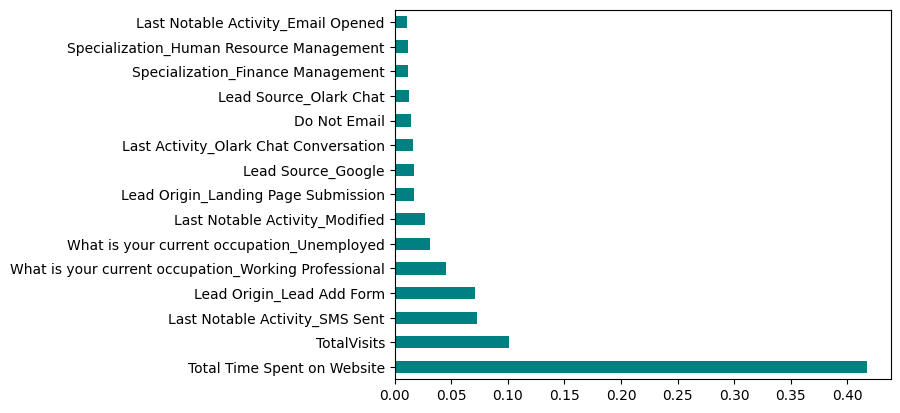

In [104]:
x=data_n.drop(['Converted'],axis=1)
#Target Variable
y=data_n['Converted']
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x, y)

(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(15)
   .plot(kind='barh',color='teal'))

In [105]:
# data_n.to_csv("scaled_data.csv")

# Training and Testing the Data

In [106]:
data_n.shape

(9240, 56)

In [107]:
from sklearn.model_selection import train_test_split

X=data_n.drop(['Converted'],axis=1)

X.head

<bound method NDFrame.head of       Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0                0            0    -1.124516                    -0.889974   
1                0            0     0.669119                     0.339972   
2                0            0    -0.407062                     1.905689   
3                0            0    -0.765789                    -0.333396   
4                0            0    -0.407062                     1.715905   
...            ...          ...          ...                          ...   
9235             1            0     1.745300                     2.476865   
9236             0            0    -0.407062                    -0.455661   
9237             1            0    -0.407062                    -0.526830   
9238             0            0    -0.048335                     0.020624   
9239             0            0     1.027846                     1.444003   

      Lead Origin_Landing Page Submission  Le

In [108]:
y=data_n['Converted']

y.head

<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64>

In [109]:
X.shape

(9240, 55)

In [110]:
y.shape

(9240,)

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3)

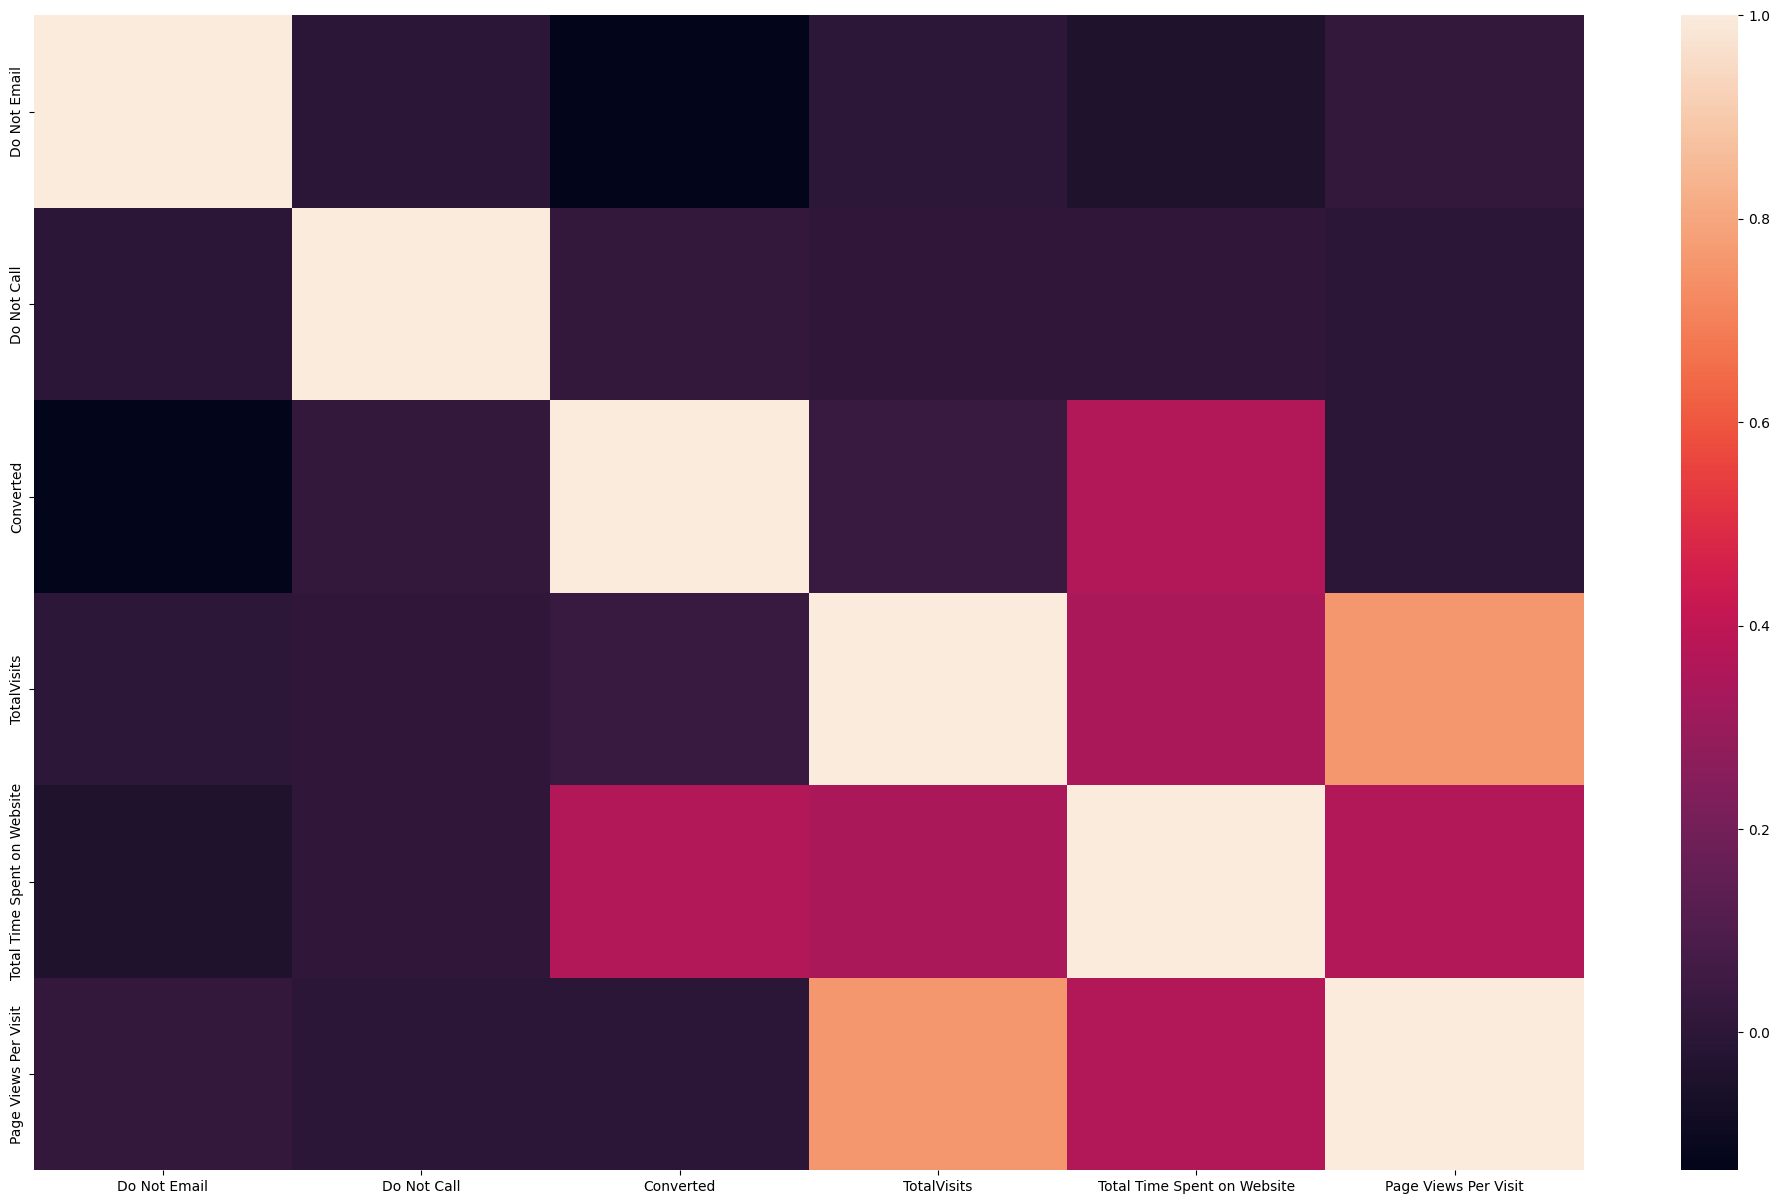

In [112]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr())
plt.show()

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Assuming logreg is your Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust parameters as needed

# Assuming X_train and y_train are your training data
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model to your data
rfe.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)



Selected Features: Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')


In [114]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 34),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Form Submitted on Website', False, 19),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Specialization_Business Administration', False, 14),
 ('Specialization_E-Business', False, 8),
 ('Specialization_E-COMMERCE', False, 20),
 ('Specialization_Finance Management', False, 15),
 ('Specialization_Healthcare Management', False, 17),
 ('Specialization_Hospitality Management', False, 25),
 ('Specialization_Human Resource Management

In [115]:
col = selected_features

X_train = X_train[col]



In [116]:
X_train.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [117]:
# fit a logistic regression model on xtrain and after adding a constant and output sum

import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
res = logm2.fit()

# Displaying the summary
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2730.5
Date:                Mon, 20 Nov 2023   Deviance:                       5460.9
Time:                        19:39:11   Pearson chi2:                 6.78e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3871
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display the VIF data
print(vif_data)



                                             Variable   VIF
0                                        Do Not Email  1.17
1                         Total Time Spent on Website  1.25
2                           Lead Origin_Lead Add Form  1.50
3                              Lead Source_Olark Chat  1.74
4                        Lead Source_Welingak Website  1.29
5               Last Activity_Olark Chat Conversation  1.41
6               Specialization_Rural and Agribusiness  1.01
7           What is your current occupation_Housewife  1.00
8             What is your current occupation_Student  1.03
9          What is your current occupation_Unemployed  1.85
10  What is your current occupation_Working Profes...  1.22
11     Last Notable Activity_Had a Phone Conversation  1.00
12                     Last Notable Activity_SMS Sent  1.41
13                  Last Notable Activity_Unreachable  1.01
14                 Last Notable Activity_Unsubscribed  1.07


In [119]:
cols_to_drop = ['What is your current occupation_Housewife']
X_train.drop(columns = cols_to_drop, inplace = True)

In [120]:
# Refit the model with the new set of features
# fit a logistic regression model on xtrain and after adding a constant and output sum

import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
res = logm3.fit()

# Displaying the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.6
Date:                Mon, 20 Nov 2023   Deviance:                       5465.3
Time:                        19:39:11   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display the VIF data
print(vif_data)

                                             Variable   VIF
0                                        Do Not Email  1.17
1                         Total Time Spent on Website  1.25
2                           Lead Origin_Lead Add Form  1.50
3                              Lead Source_Olark Chat  1.74
4                        Lead Source_Welingak Website  1.29
5               Last Activity_Olark Chat Conversation  1.41
6               Specialization_Rural and Agribusiness  1.01
7             What is your current occupation_Student  1.03
8          What is your current occupation_Unemployed  1.85
9   What is your current occupation_Working Profes...  1.22
10     Last Notable Activity_Had a Phone Conversation  1.00
11                     Last Notable Activity_SMS Sent  1.41
12                  Last Notable Activity_Unreachable  1.01
13                 Last Notable Activity_Unsubscribed  1.07


In [122]:
# column_to_drop = ['Last Notable Activity_Email Marked Spam']

# X_train.drop(columns=column_to_drop, inplace=True)


In [123]:
# import statsmodels.api as sm

# # Assuming X_train and y_train are your training data
# X_train_sm = sm.add_constant(X_train)

# # Creating a logistic regression model
# logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# # Fitting the model
# res = logm4.fit()

# # Displaying the summary
# print(res.summary())

In [124]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Assuming X_train is your feature matrix
# vif_data = pd.DataFrame()
# vif_data["Variable"] = X_train.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# # Round VIF values to 2 decimal places
# vif_data["VIF"] = vif_data["VIF"].round(2)

# # Display the VIF data
# print(vif_data)

In [125]:
#column_to_drop = ['Last Notable Activity_Resubscribed to emails', 'What matters most to you in choosing a course_Flexibility & Convenience']

#X_train.drop(columns=column_to_drop, inplace=True)

# Model Evaluation

In [126]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1989    0.734527
8790    0.926525
2972    0.198277
8481    0.181722
1335    0.746782
3722    0.672568
3022    0.951041
741     0.162566
5046    0.231863
5493    0.097153
dtype: float64

In [127]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73452728, 0.92652489, 0.19827676, 0.18172192, 0.74678162,
       0.67256837, 0.9510407 , 0.16256635, 0.23186278, 0.09715254])

In [128]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
#y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob
0,1,0.734527
1,1,0.926525
2,0,0.198277
3,0,0.181722
4,1,0.746782


In [129]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,predicted
0,1,0.734527,1
1,1,0.926525,1
2,0,0.198277,0
3,0,0.181722,0
4,1,0.746782,1


In [130]:
#import statements
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score

In [131]:
#y_true is the actual labels and y_pred is the predicted labels
y_true = y_train_pred_final.Converted
y_pred = y_train_pred_final.predicted

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3502  469]
 [ 783 1714]]


In [132]:
# Classification Report
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3971
           1       0.79      0.69      0.73      2497

    accuracy                           0.81      6468
   macro avg       0.80      0.78      0.79      6468
weighted avg       0.80      0.81      0.80      6468



In [133]:
# Sensitivity, Specificity, Precision, Recall, and Accuracy
TP = conf_matrix[1, 1]  # True Positive
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (True Positive Rate): 0.69
Specificity (True Negative Rate): 0.88
Precision: 0.79
Accuracy: 0.81


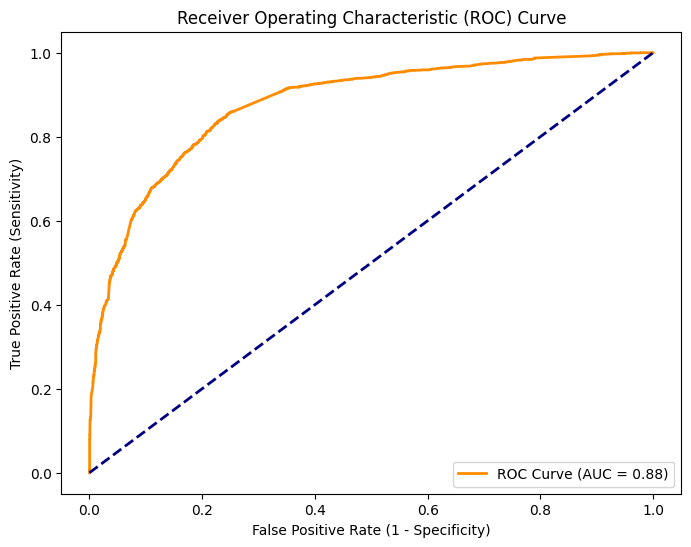

In [134]:
#predicted probabilities for the positive class
y_prob = y_train_pred_final.Lead_Score_Prob

#ROC curve and ROC area for the positive class
fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

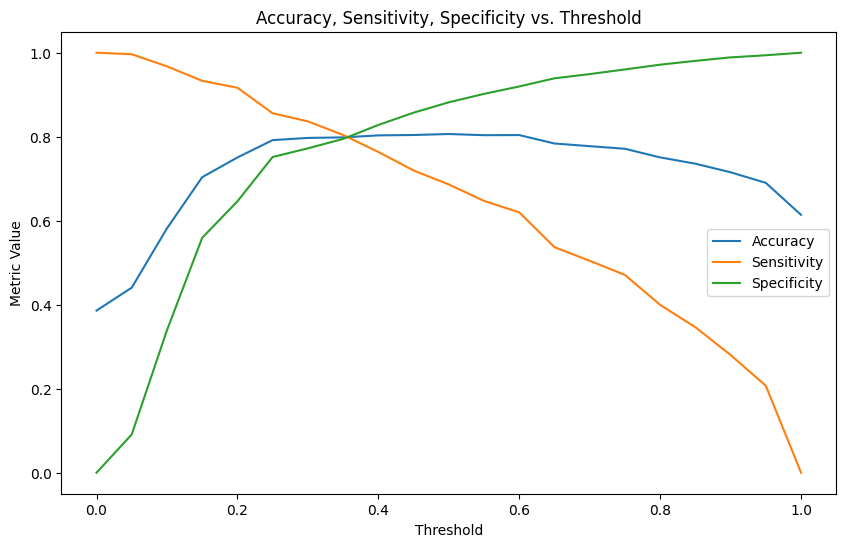

In [135]:
# Plot Accuracy, Sensitivity, Specificity with different thresholds
thresholds_range = np.arange(0, 1.05, 0.05)
accuracy_list = []
sensitivity_list = []
specificity_list = []

for threshold in thresholds_range:
    y_train_pred_final['predicted_threshold'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > threshold else 0)
    conf_matrix_threshold = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_threshold)
    accuracy = (conf_matrix_threshold[0, 0] + conf_matrix_threshold[1, 1]) / float(np.sum(conf_matrix_threshold))
    sensitivity = conf_matrix_threshold[1, 1] / float(conf_matrix_threshold[1, 1] + conf_matrix_threshold[1, 0])
    specificity = conf_matrix_threshold[0, 0] / float(conf_matrix_threshold[0, 0] + conf_matrix_threshold[0, 1])

    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Plot Accuracy, Sensitivity, Specificity vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds_range, accuracy_list, label='Accuracy')
plt.plot(thresholds_range, sensitivity_list, label='Sensitivity')
plt.plot(thresholds_range, specificity_list, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Accuracy, Sensitivity, Specificity vs. Threshold')
plt.legend()
plt.show()


In [136]:
# Find the cutoff point where metrics intersect
optimal_threshold = 0
min_difference = float('inf')

for i, (acc, sens, spec) in enumerate(zip(accuracy_list, sensitivity_list, specificity_list)):
    # Calculate the absolute differences between the metrics
    diff_acc_sens = abs(acc - sens)
    diff_acc_spec = abs(acc - spec)
    diff_sens_spec = abs(sens - spec)

    # Calculate the average difference
    avg_diff = (diff_acc_sens + diff_acc_spec + diff_sens_spec) / 3

    # Check if the average difference is the minimum encountered so far
    if avg_diff < min_difference:
        min_difference = avg_diff
        optimal_threshold = thresholds_range[i]

# Print the cutoff point
print(f"Intersection Cutoff Point: {optimal_threshold:.4f}")


Intersection Cutoff Point: 0.3500


In [137]:
# Update predictions based on the optimal cutoff
y_train_pred_final['predicted_optimal'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > optimal_threshold else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,predicted,predicted_threshold,predicted_optimal
0,1,0.734527,1,0,1
1,1,0.926525,1,0,1
2,0,0.198277,0,0,0
3,0,0.181722,0,0,0
4,1,0.746782,1,0,1


In [138]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Lead_Score_Prob,predicted,predicted_threshold,predicted_optimal,Lead_Score
0,1,0.734527,1,0,1,73
1,1,0.926525,1,0,1,93
2,0,0.198277,0,0,0,20
3,0,0.181722,0,0,0,18
4,1,0.746782,1,0,1,75


In [139]:
# Confusion Matrix with the optimal cutoff
conf_matrix_optimal = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_optimal)
print("Confusion Matrix with Optimal Cutoff:")
print(conf_matrix_optimal)

Confusion Matrix with Optimal Cutoff:
[[3156  815]
 [ 489 2008]]


In [140]:
# Sensitivity, Specificity, Precision, Recall, and Accuracy
TP = conf_matrix_optimal[1, 1]  # True Positive
TN = conf_matrix_optimal[0, 0]  # True Negative
FP = conf_matrix_optimal[0, 1]  # False Positive
FN = conf_matrix_optimal[1, 0]  # False Negative

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (True Positive Rate): 0.80
Specificity (True Negative Rate): 0.79
Precision: 0.71
Accuracy: 0.80


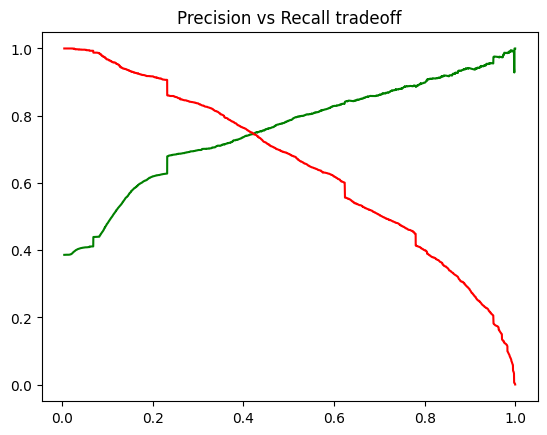

In [141]:
#Let us generate the Precision vs Recall tradeoff curve
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

# Prediction on the Test Set

In [142]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Specialization_Rural and Agribusiness,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
5608,1,-0.548728,0,0,0,0,1,0,0,1,0,0,0,0,0
479,0,-0.886324,0,0,0,0,0,0,0,1,0,0,0,0,0
7819,0,-0.889974,0,1,0,0,0,0,0,1,0,0,0,0,0
6254,0,-0.833403,0,0,0,1,0,0,0,1,0,0,0,0,0
2675,0,-0.889974,1,0,0,0,0,0,0,0,1,0,1,0,0


In [143]:
# adding constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Specialization_Rural and Agribusiness,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
5608,1.0,1,-0.548728,0,0,0,0,1,0,0,1,0,0,0,0,0
479,1.0,0,-0.886324,0,0,0,0,0,0,0,1,0,0,0,0,0
7819,1.0,0,-0.889974,0,1,0,0,0,0,0,1,0,0,0,0,0
6254,1.0,0,-0.833403,0,0,0,1,0,0,0,1,0,0,0,0,0
2675,1.0,0,-0.889974,1,0,0,0,0,0,0,0,1,0,1,0,0


In [144]:
#check if train and test both have same features
X_train_sm.shape

(6468, 15)

In [145]:
X_test_sm.shape

(2772, 16)

In [146]:
# we can see that there is an extra column present in X_test that we dropped in X_train
#dropping the extra column
cols_to_drop = ['What is your current occupation_Housewife']
X_test_sm.drop(columns = cols_to_drop, inplace = True)
X_test_sm.shape

(2772, 15)

In [147]:
# make prediction
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]


5608    0.063918
479     0.082419
7819    0.231863
6254    0.022731
2675    0.996706
5337    0.995643
6651    0.918535
8676    0.375603
1958    0.068840
1162    0.231863
dtype: float64

In [148]:
# convert y_test prediction to df and check head
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5608,0.063918
479,0.082419
7819,0.231863
6254,0.022731
2675,0.996706


In [149]:
# convert actual y_test to df and check head
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
5608,0
479,0
7819,0
6254,0
2675,1


In [150]:
# merge both df

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.063918
1,0,0.082419
2,0,0.231863
3,0,0.022731
4,1,0.996706


In [151]:
#rename column 0 to lead_score_prob
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.063918
1,0,0.082419
2,0,0.231863
3,0,0.022731
4,1,0.996706


In [152]:
# make predictions using optimal cutoff
y_pred_final['Optimal_Prediction'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > optimal_threshold else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Optimal_Prediction
0,0,0.063918,0
1,0,0.082419,0
2,0,0.231863,0
3,0,0.022731,0
4,1,0.996706,1


In [153]:
# Classification Report with the optimal cutoff
class_report_optimal = classification_report(y_pred_final.Converted, y_pred_final.Optimal_Prediction)
print("Classification Report of y test prediction with Optimal Cutoff:")
print(class_report_optimal)

Classification Report of y test prediction with Optimal Cutoff:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1708
           1       0.72      0.82      0.77      1064

    accuracy                           0.81      2772
   macro avg       0.80      0.81      0.80      2772
weighted avg       0.82      0.81      0.81      2772



In [154]:
#y_true is the actual labels and y_pred is the predicted labels
y_true = y_pred_final.Converted
y_pred = y_pred_final.Optimal_Prediction

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1366  342]
 [ 190  874]]


In [155]:
# calculate Sensivity, specifivity, precision and accuracy

TP = conf_matrix[1,1] # true positive
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (True Positive Rate): 0.82
Specificity (True Negative Rate): 0.80
Precision: 0.72
Accuracy: 0.81


CONCLUSION: The prediction testing proves that the model can effectively detect hot leads. By using the optimal cutoff value, the model showed it could accurately identify hot leads. The classificatino report at the end gives a quick overview confirming that the model is pretty good at determining if a lead is hot or not.